# Regression

## In this Lesson
* Regression Fundamentals
* General Line Fitting
* Scikit-learn
* Regression as Machine Learning


# Regression Fundametals

Regression is a technique commonly used to find lines of best fit for data sets. The most common regression method is [Least Squares Regression](https://www.mathsisfun.com/data/least-squares-regression.html)

For this lesson, I'm going to work through an example.

We will use the London Underground travel times dataset from [this freedom of information request](https://www.whatdotheyknow.com/request/distance_between_adjacent_underg) (as featured in other lessons).


First read in and plot our data. We will be looking to predict the expected travel time for a given station distance.

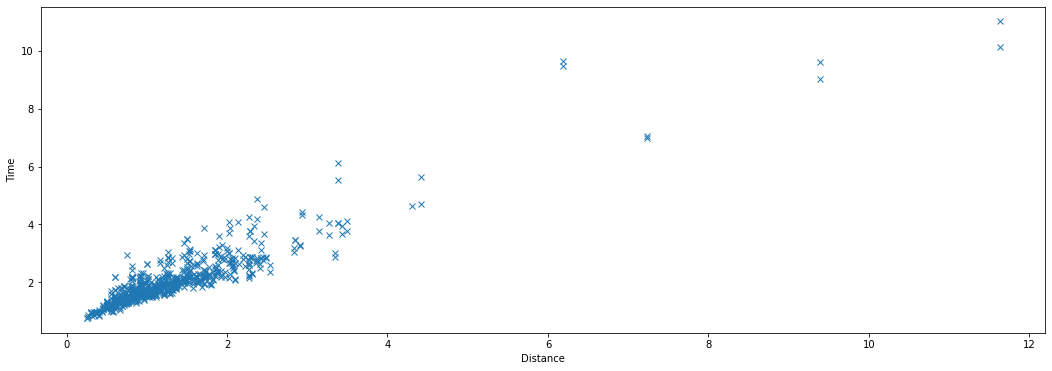

In [3]:

# Import pandas
import pandas as pd

# Import matplot lib
import matplotlib.pyplot as plt

# Read excel with pandas
df = pd.read_excel("../data/Inter station database.xls", sheet_name="Runtime", skiprows=1)

# Plot a scatter plot for the data we want to model
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.xlabel("Distance")
plt.ylabel("Time")
plt.show()


As you can see, our data looks pretty linear, first, let's take a guess at what a good line of best fit might be.

To do this, we are going to define a function for a straight line, `y = mx + c`

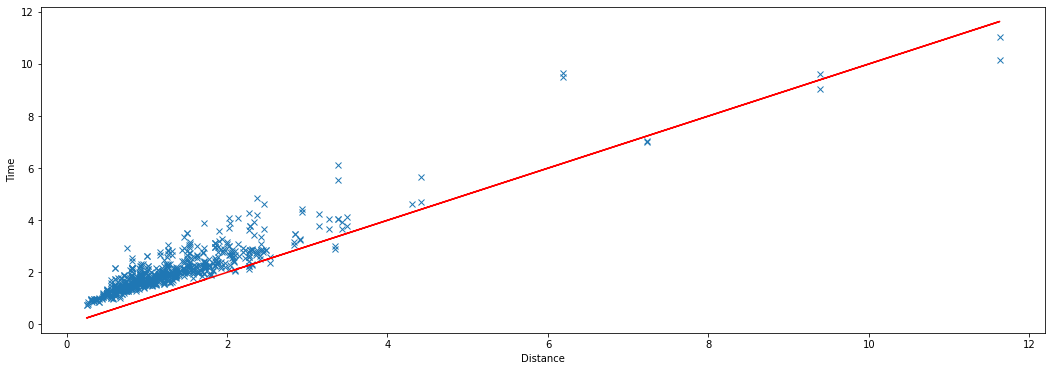

In [6]:

# Define a function for our straight line
def straight_line(x, m, c):
    return m*x + c

# Guess some values for m and c
m_guess = 1
c_guess = 0

# Use our function to calculate a new column in our dataframe with the guess values
# In this case, 'x' is distance
df["guess"] = df["Distance (Kms)"].apply(lambda x: straight_line(x, m_guess, c_guess))

# Plot our guess line against the data
fig, ax = plt.subplots(figsize=(18, 6))
# Data first
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers

# Now our guess line
plt.plot(df["Distance (Kms)"], df["guess"], color="red")

# And display
plt.xlabel("Distance")
plt.ylabel("Time")
plt.show()


Not terreble for a first guess, but is there a way we can quantify exactly how good/bad it is?

## Question

Discuss how might we measure the goodness of this line?

## Answer
(Well, an answer)

We can use something known as the square of the residuals.

The residual is defined as the difference between our guess and the true value.

Squaring the residual helps by both ensuring all values are positive and by producing larger values for large residuals (penalising them more in the optimisation).

## Exercise

Add a column for the squared residuals to our dataframe.

In [ ]:

# Display function to view data (jupyter notebooks only)
from IPython.display import display









# Display
display(df)


## Solution

In [7]:

# Display function to view data (jupyter notebooks only)
from IPython.display import display

df["residual"] = df["Un-impeded Running Time (Mins)"] - df["guess"]

df["r_squared"] = df["residual"] ** 2

# Display
display(df)


,Line,Direction,Station from (A),Station to (B),Distance (Kms),Un-impeded Running Time (Mins),AM peak (0700-1000) Running Time (Mins),Inter peak (1000 - 1600) Running time (mins),guess,residual,r_squared
0,Bakerloo,Southbound,HARROW & WEALDSTONE,KENTON,1.74,2.233333,2.500000,2.500000,1.74,0.493333,0.243378
1,Bakerloo,Southbound,KENTON,SOUTH KENTON,1.40,1.883333,2.000000,2.000000,1.40,0.483333,0.233611
2,Bakerloo,Southbound,SOUTH KENTON,NORTH WEMBLEY,0.90,1.500000,1.500000,1.500000,0.90,0.600000,0.360000
3,Bakerloo,Southbound,NORTH WEMBLEY,WEMBLEY CENTRAL,1.27,1.916667,2.058824,2.058824,1.27,0.646667,0.418178
4,Bakerloo,Southbound,WEMBLEY CENTRAL,STONEBRIDGE PARK,1.71,2.233333,3.125000,3.125000,1.71,0.523333,0.273878
...,...,...,...,...,...,...,...,...,...,...,...
738,East London,Southbound,WAPPING,ROTHERHITHE,0.51,1.166667,1.500000,1.500000,0.51,0.656667,0.431211
739,East London,Southbound,ROTHERHITHE,CANADA WATER,0.32,0.933333,1.000000,1.000000,0.32,0.613333,0.376178
740,East London,Southbound,CANADA WATER,SURREY QUAYS,0.55,1.700000,2.000000,2.089286,0.55,1.150000,1.322500
741,East London,Southbound,SURREY QUAYS,NEW CROSS,2.27,4.266667,4.500000,4.500000,2.27,1.996667,3.986678


Does `r_squared` sound familiar? You may have heard this before in the context of data science and machine learning, as it is a popular metric for measuring the accuracy of regression models.

The "R Squared" score is produced by normalising the sum of these squared residuals by the variance of the dataset.

The variance is calculated as the mean square difference between each value and the mean of the dataset. See the calculation in pandas below:

In [8]:

df["squared_deviation"] = (df["Un-impeded Running Time (Mins)"] - df["Un-impeded Running Time (Mins)"].mean()) ** 2

var = df["squared_deviation"].mean()

print("Variance : {}".format(var))


Variance : 1.0988594510833491


This lines up with the pandas in-built variance function (possibly a few rounding errors):

In [9]:
var = df["Un-impeded Running Time (Mins)"].var()

print("Variance : {}".format(var))

Variance : 1.1003403937397955


To calculate the R Squared score we divide the sum of our square residuals by the sum of the square deviations (proportional to variance) and subtract from 1.

In [17]:

r_2 = 1 - (df["r_squared"].sum() / df["squared_deviation"].sum())

print("R_2 : {}".format(r_2))


R_2 : 0.3582606073554572


0.36 is a pretty good starting value for an R Squared score. The values for R Squared typically range between 0 and 1.

To optimise our line of best fit, we need to find the values of `m` and `c` which maximise our R Squared score.

There are many different value maximisation (or minimisation) algorithms available, however, for this, I will be using the default one available with [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

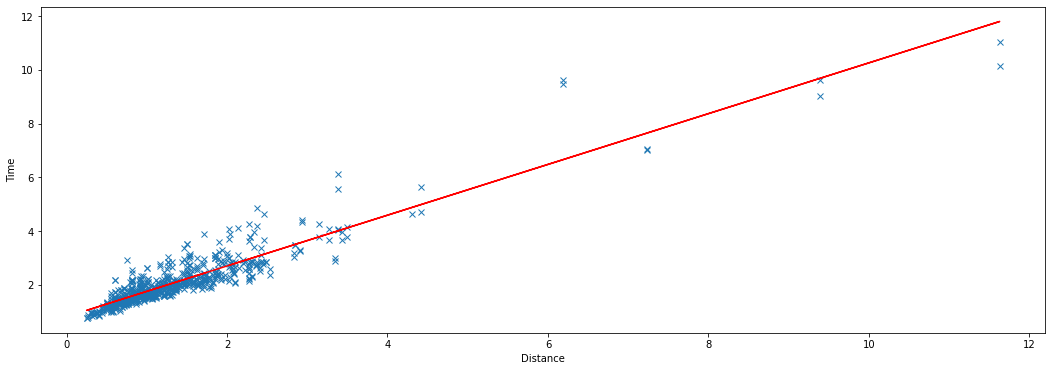

In [18]:

# Import minimisation function
from scipy.optimize import minimize

# A function to calculate the sum of the residuals
# We want to minimise this to maximise R Squared
def get_residual_square_sum(values):
    # Split out m and c from provided input
    m = values[0]
    c = values[1]
    # Apply y = mx + c to all points
    opt_guess = df["Distance (Kms)"].apply(lambda x: straight_line(x, m, c))
    # Square residuals
    square_residuals = (df["Un-impeded Running Time (Mins)"] - opt_guess) ** 2
    # Return sum of the residuals
    return square_residuals.sum()

# Run
result = minimize(get_residual_square_sum, [m_guess, c_guess])

# Pull out optimised m and c
m_opt = result.x[0]
c_opt = result.x[1]

# Apply optimised results to our data frame
df["opt"] = df["Distance (Kms)"].apply(lambda x: straight_line(x, m_opt, c_opt))

# Plot against the data
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.plot(df["Distance (Kms)"], df["opt"], color="red")
plt.xlabel("Distance")
plt.ylabel("Time")
# Display
plt.show()


We can now also calculate the R Squared score for this line:

In [19]:

opt_r_2 = 1 - (get_residual_square_sum([m_opt, c_opt]) / df["squared_deviation"].sum())

print("R_2 : {}".format(opt_r_2))


R_2 : 0.8587909784274484


Much better!

Note, I've deliberately gone a roundabout way of doing this in order to explain how it works. A much simpler way would be to use the SciPy library [curve fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function. As below:

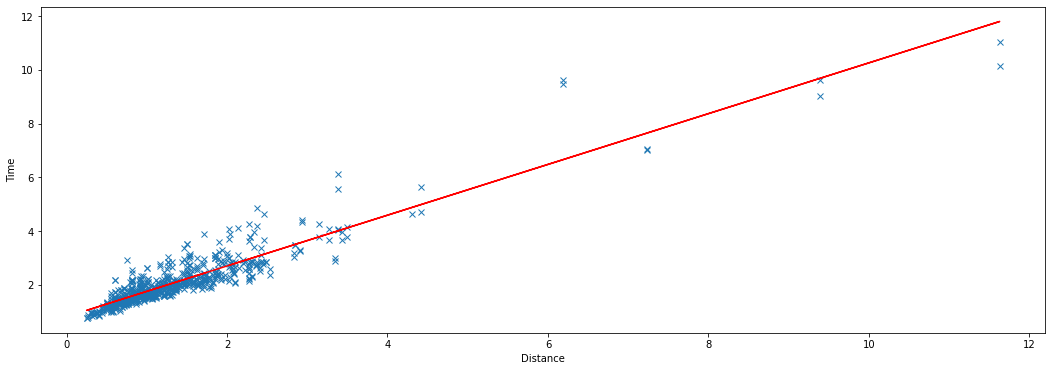

In [21]:

# Import curve fit function
from scipy.optimize import curve_fit

# Run linear regression
popt, pcov = curve_fit(straight_line, df["Distance (Kms)"], df["Un-impeded Running Time (Mins)"])

# Apply optimised results to our data frame
df["opt_2"] = df["Distance (Kms)"].apply(lambda x: straight_line(x, *popt))

# Plot against the data
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.plot(df["Distance (Kms)"], df["opt_2"], color="red")
plt.xlabel("Distance")
plt.ylabel("Time")
# Display
plt.show()


Similarly, let's use Scikit-learn to calculate the R Squared

In [23]:

# Import function
from sklearn.metrics import r2_score

alt_r_2 = r2_score(df["Un-impeded Running Time (Mins)"], df["opt_2"])

print("R_2 : {}".format(opt_r_2))


R_2 : 0.8587909784274484


The same as before!

# Does our line have to be linear?

No!

## Question

Considering the `curve_fit` solution, how might you change it to fit some other kind of line?


## Answer

See below example for a quadratic line

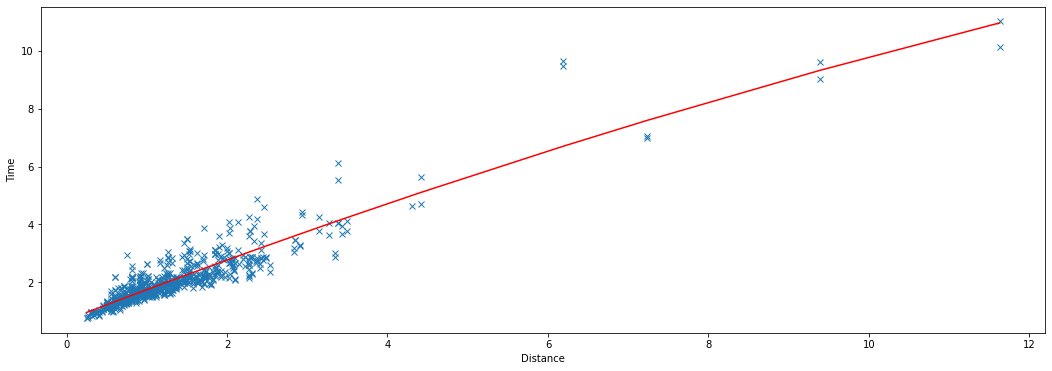

In [28]:

# Quadratic function
def quad(x, c2, c1, c0):
    return (x**2)*c2 + x*c1 + c0

# Run least squares regression
popt, pcov = curve_fit(quad, df["Distance (Kms)"], df["Un-impeded Running Time (Mins)"])

# Apply optimised results to our data frame
df["quardatic"] = df["Distance (Kms)"].apply(lambda x: quad(x, *popt))

# To display the quadratic line correctly we need to sort by distance before plotting
df = df.sort_values("Distance (Kms)")

# Plot against the data
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.plot(df["Distance (Kms)"], df["quardatic"], color="red")
plt.xlabel("Distance")
plt.ylabel("Time")
# Display
plt.show()


We can also work out an R Squared for our quadratic fit!

In [30]:
quad_r_2 = r2_score(df["Un-impeded Running Time (Mins)"], df["quardatic"])

print("R_2 : {}".format(quad_r_2))

R_2 : 0.8629514669506747


Even better than the linear fit!

This methodology can be applied to fit any kind of line, think of a gaussian distribution for example!


# Regression as Machine Learning

... tbc inc. Sklearn method